# 线性SVM分类

你可以将SVM分类器视为在类别之间拟合可能的最宽的街道。因此这也叫做大间隔分类（large margin classification）。

请注意，在街道以外的地方增加更多的训练实例，不会对决策边界产生影响：也就是说它完全由位于街道边缘的实例所决定（或者叫“支持”）。这些实例被称为支持向量。

**SVM对特征的缩放非常敏感**

## 软间隔分类

如果我们严格地让所有实例都不在街道上，并且位于正确的一边，这就是硬间隔分类。

硬间隔分类有两个问题：
- 只在数据时线性可分离的时候才有效；
- 对异常值非常敏感。

要避免这些问题，最好使用更灵活的模型。目标是尽可能在保持街道宽阔和限制间隔违例之间找到良好的平衡，这就是软间隔分类。


In [7]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Viginica

svm_clf = Pipeline(
    (
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    )
)

svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

# 非线性SVM分类

处理非线性数据集的方法之一是添加更多特征，比如多项式特征，在某些情况下，这可能导致数据集变得线性可分离。

In [11]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
))

polynomial_svm_clf.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

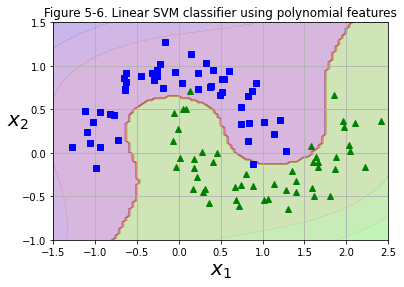

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title('Figure 5-6. Linear SVM classifier using polynomial features')# not shown in the book 

plt.show()

## 多项式核

核技巧产生的结果就跟添加了许多多项式特征，甚至是非常高阶的多项式特征一样，但实际上并不需要真的添加。

In [13]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel='poly', degree=3, coef0=1, C=5))
))

poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

In [14]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])

poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

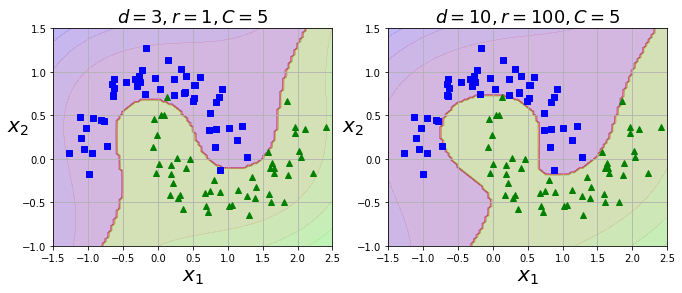

In [15]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

plt.show()

## 添加相似特征

解决非线性问题的另一种技术是添加相似特征。
这些特征经过*相似函数*计算得出，相似函数可以测量每个实例与一个特定地标（landmark）之间的相似度。


## 高斯RBF核函数

## 计算复杂度

# SVM回归

# 工作原理

## 决策函数和预测

# 训练目标

## 二次规划

## 对偶问题

## 核化SVM

## 在线SVM